In [1]:
import pandas as pd
import matplotlib as plt
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
#import csv

ModuleNotFoundError: No module named 'pandas'

In [3]:
train = pd.read_csv("GiveMeSomeCredit\cs-training.csv")
test = pd.read_csv("GiveMeSomeCredit\cs-test.csv")

In [4]:
train.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [5]:
train = train.drop_duplicates()

In [6]:
train.duplicated().sum()

0

In [7]:
train.shape

(150000, 12)

In [8]:
test.shape

(101503, 12)

In [9]:
def FindMiss(df):
  return round(df.isnull().sum()/df.shape[0]*100,2)


In [10]:
train[train.NumberOfDependents.isnull()]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
8,9,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
96,97,0,0.542243,48,2,10.0,NaN,2,0,0,0,NaN
109,110,0,0.041258,61,0,4739.0,NaN,11,0,4,0,NaN
159,160,0,0.000000,63,0,2.0,NaN,4,0,0,0,NaN
238,239,0,1.000000,28,0,0.0,NaN,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
149826,149827,0,0.027319,71,0,1419.0,NaN,13,0,1,0,NaN
149854,149855,0,0.056589,75,0,8.0,NaN,3,0,0,0,NaN
149894,149895,0,0.017904,55,0,1058.0,NaN,8,0,1,1,NaN
149948,149949,0,0.055530,27,0,10.0,NaN,1,0,0,0,NaN


In [11]:
train[train.MonthlyIncome.isnull()].describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,29731.000000,29731.000000,29731.000000,29731.000000,29731.000000,29731.000000,0.0,29731.000000,29731.000000,29731.000000,29731.000000,25807.000000
mean,74897.295786,0.056137,6.649421,56.362349,0.579866,1673.396556,NaN,7.216071,0.484612,0.871481,0.452995,0.316310
std,43364.172076,0.230189,217.814854,15.438786,6.255361,4248.372895,NaN,4.842720,6.250408,1.034291,6.242076,0.809944
min,7.000000,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36769.500000,0.000000,0.016027,46.000000,0.000000,123.000000,NaN,4.000000,0.000000,0.000000,0.000000,0.000000
50%,75111.000000,0.000000,0.081697,57.000000,0.000000,1159.000000,NaN,6.000000,0.000000,1.000000,0.000000,0.000000
75%,112544.500000,0.000000,0.440549,67.000000,0.000000,2382.000000,NaN,10.000000,0.000000,1.000000,0.000000,0.000000
max,149998.000000,1.000000,22198.000000,109.000000,98.000000,329664.000000,NaN,45.000000,98.000000,23.000000,98.000000,9.000000


In [12]:
fam_miss = train[train.NumberOfDependents.isnull()]
fam_nmiss = train[train.NumberOfDependents.notnull()]

In [13]:
fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)

C:\Users\udayp\AppData\Local\Temp\ipykernel_43668\3489319309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)


In [14]:
fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)

C:\Users\udayp\AppData\Local\Temp\ipykernel_43668\295137857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)


In [15]:
fam_miss

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
8,9,0,0.116951,27,0,46.0,0.0,2,0,0,0,0.0
96,97,0,0.542243,48,2,10.0,0.0,2,0,0,0,0.0
109,110,0,0.041258,61,0,4739.0,0.0,11,0,4,0,0.0
159,160,0,0.000000,63,0,2.0,0.0,4,0,0,0,0.0
238,239,0,1.000000,28,0,0.0,0.0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149826,149827,0,0.027319,71,0,1419.0,0.0,13,0,1,0,0.0
149854,149855,0,0.056589,75,0,8.0,0.0,3,0,0,0,0.0
149894,149895,0,0.017904,55,0,1058.0,0.0,8,0,1,1,0.0
149948,149949,0,0.055530,27,0,10.0,0.0,1,0,0,0,0.0


In [16]:
FindMiss(fam_miss)

Unnamed: 0                              0.0
SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [17]:
FindMiss(fam_nmiss)

Unnamed: 0                               0.00
SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           17.67
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       0.00
dtype: float64

In [18]:
fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())

C:\Users\udayp\AppData\Local\Temp\ipykernel_43668\100680096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())


In [20]:
FindMiss(fam_nmiss)
fam_nmiss['MonthlyIncome'].isnull().sum()

0

In [21]:
new_train = fam_nmiss._append(fam_miss)

In [22]:
FindMiss(fam_miss)

Unnamed: 0                              0.0
SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [23]:
FindMiss(new_train)

Unnamed: 0                              0.0
SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [24]:
new_train.shape

(150000, 12)

In [25]:
new_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [26]:
new_train.groupby(['SeriousDlqin2yrs']).size()/new_train.shape[0]

SeriousDlqin2yrs
0    0.93316
1    0.06684
dtype: float64

In [27]:
util_drop = new_train.drop(new_train[new_train['RevolvingUtilizationOfUnsecuredLines'] > 10].index)

In [28]:
util_drop.shape

(149759, 12)

<Axes: ylabel='age'>

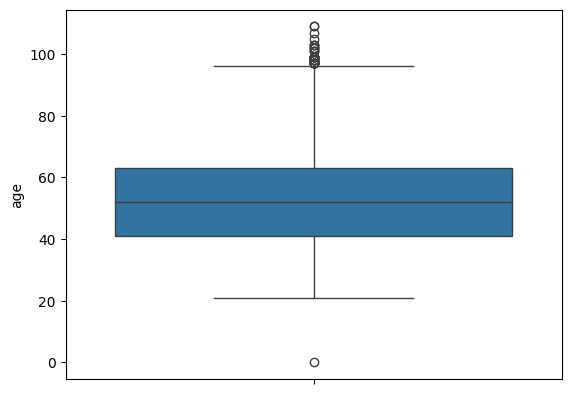

In [29]:
sns.boxplot(util_drop['age'])

In [30]:
util_drop.groupby(['NumberOfTime30-59DaysPastDueNotWorse']).size()

NumberOfTime30-59DaysPastDueNotWorse
0     125804
1      16020
2       4588
3       1750
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
dtype: int64

In [31]:
util_drop.groupby(['NumberOfTime60-89DaysPastDueNotWorse']).size()

NumberOfTime60-89DaysPastDueNotWorse
0     142166
1       5723
2       1117
3        318
4        104
5         34
6         16
7          8
8          2
9          1
11         1
96         5
98       264
dtype: int64

In [32]:
util_drop.groupby(['NumberOfTimes90DaysLate']).size()

NumberOfTimes90DaysLate
0     141429
1       5238
2       1554
3        666
4        291
5        131
6         80
7         38
8         20
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
dtype: int64

In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [34]:
model = XGBClassifier(tree_method = 'exact')

In [35]:
util_drop['MonthlyIncome'] = util_drop['MonthlyIncome'].fillna(util_drop['MonthlyIncome'].median)

In [36]:
util_drop

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149826,149827,0,0.027319,71,0,1419.000000,0.0,13,0,1,0,0.0
149854,149855,0,0.056589,75,0,8.000000,0.0,3,0,0,0,0.0
149894,149895,0,0.017904,55,0,1058.000000,0.0,8,0,1,1,0.0
149948,149949,0,0.055530,27,0,10.000000,0.0,1,0,0,0,0.0


In [37]:
FindMiss(util_drop)

Unnamed: 0                              0.0
SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [38]:
# Convert MonthlyIncome to numeric, invalid values will become NaN
util_drop['MonthlyIncome'] = util_drop['MonthlyIncome'].fillna(util_drop['MonthlyIncome'].median())


In [39]:
util_drop['MonthlyIncome'].isnull().sum()

0

In [40]:
x = util_drop.drop(['SeriousDlqin2yrs'],axis=1)
y = util_drop['SeriousDlqin2yrs']

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [42]:
model.fit(X_train,Y_train)
y_hat = model.predict(X_test)

In [43]:
accuracy_score(Y_test,y_hat)

0.9339610042735043

In [45]:
cm = confusion_matrix(Y_test,y_hat)

Text(50.722222222222214, 0.5, 'actuals')

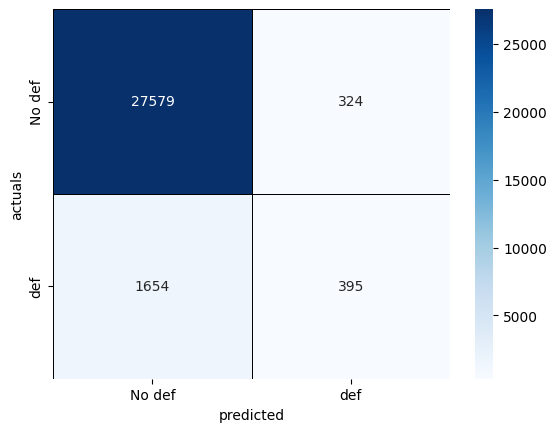

In [46]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5,linecolor='Black')
plt.xticks(np.arange(2)+.5,['No def', 'def'])
plt.yticks(np.arange(2)+.5,['No def', 'def'])
plt.xlabel("predicted")
plt.ylabel("actuals")